In [2]:
from immsim import immsim
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

# Scénario référence

In [3]:
ref = immsim()
ref.set_npr_policy(entry_cap = 252e3, renewal_rate = 0.8)
ref.set_imm_policy(entry_cap = 50e3, accept_rate = 0.1)
ref.proj(2025)

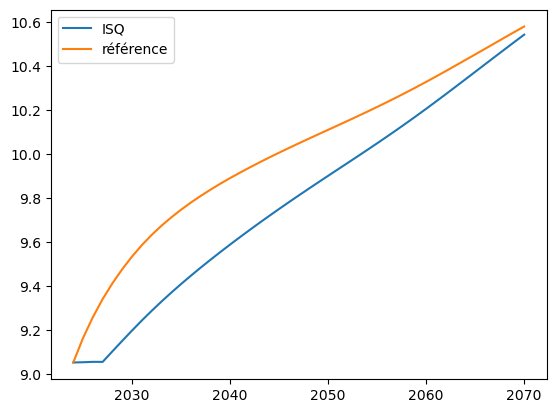

In [4]:
plt.figure()
plt.plot(ref.pop.loc[2024:,:].sum(axis=1)*1e-6,label='ISQ')
plt.plot(ref.pop_sim.loc[2024:,:].sum(axis=1)*1e-6,label='référence')
plt.legend()
#plt.savefig('../Figures/scn_ref_pop.png',dpi=1200)
plt.show()

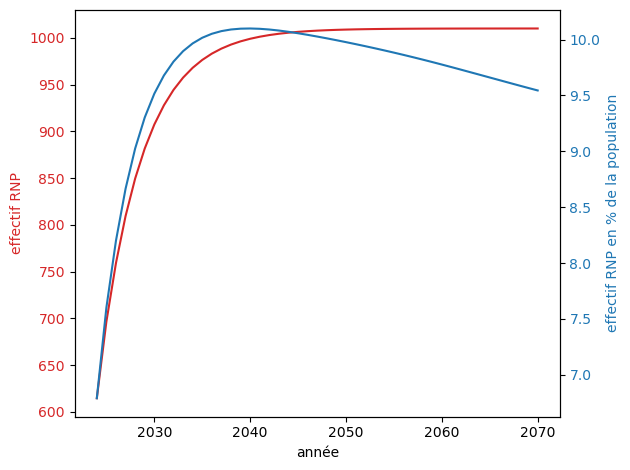

In [5]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('effectif RNP', color=color)
ax1.plot(ref.npr_sim.loc[2024:,:].sum(axis=1)*1e-3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('effectif RNP en % de la population', color=color)  # we already handled the x-label with ax1
ax2.plot(ref.npr_sim.loc[2024:,:].sum(axis=1)/ref.pop_sim.loc[2024:,:].sum(axis=1)*100, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('../Figures/scn_ref_solde.png',dpi=1200)
plt.show()

In [6]:
ref.pop_sim.loc[2024,:].sum()*0.05

452583.15

# Scénario fédéral sur les sorties

In [7]:
fed = immsim()
fed.set_npr_policy(entry_cap = 252e3, renewal_rate = 0.58)
fed.set_imm_policy(entry_cap = 50e3, accept_rate = 0.08)
fed.proj(2025)

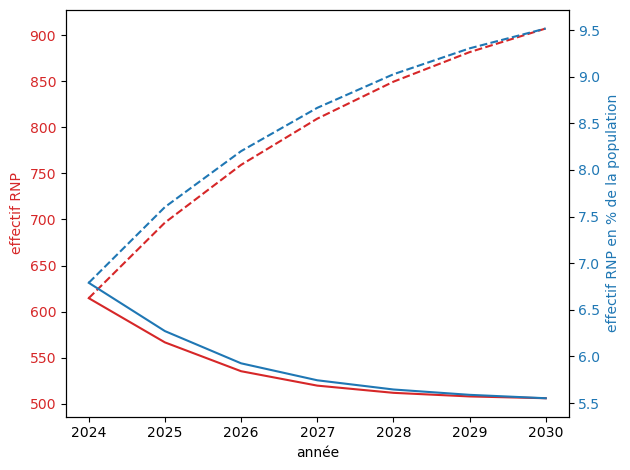

In [8]:
year_end = 2030
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('effectif RNP', color=color)
ax1.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, linestyle='--',label='référence')
ax1.plot(fed.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, label='sortie fédéral')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('effectif RNP en % de la population', color=color)  # we already handled the x-label with ax1
ax2.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)/ref.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,linestyle='--',label='référence')
ax2.plot(fed.npr_sim.loc[2024:year_end,:].sum(axis=1)/fed.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,label='sortie fédéral')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#fig.savefig('../Figures/scn_fed_solde.png',dpi=1200)
plt.show()

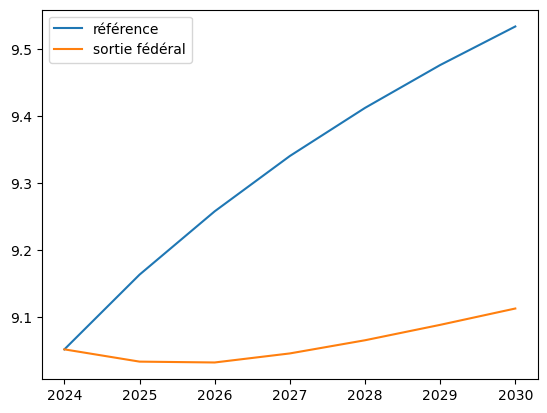

In [9]:
plt.figure()
plt.plot(ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='référence')
plt.plot(fed.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='sortie fédéral')
plt.legend()
#plt.savefig('../Figures/scn_fed_pop.png',dpi=1200)
plt.show()

Experiment with exit rate

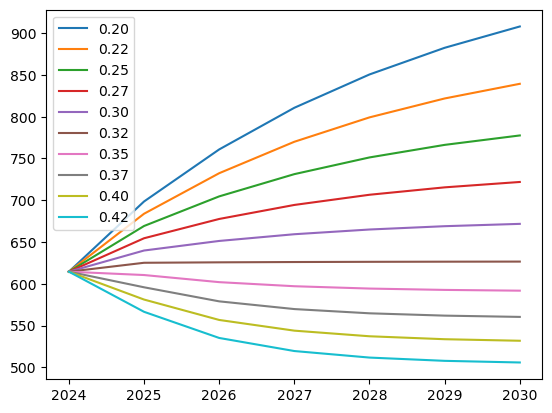

In [10]:
accept_rates = np.linspace(0.2,0.42,10)
plt.figure()
for a in accept_rates:
    ex = immsim()
    ex.set_npr_policy(entry_cap = 252e3, renewal_rate = 1 - a)
    ex.set_imm_policy(entry_cap = 50e3, accept_rate = 0.08)
    ex.proj(2025)
    #cap_for_label = int(pr_cap*1e-3)
    plt.plot(ex.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3,label=f'{a:.2f}')
plt.legend()
plt.show()

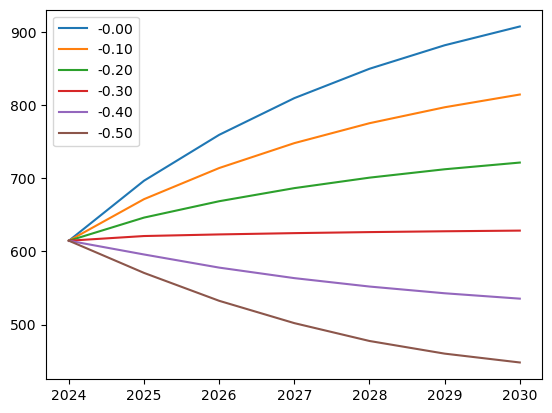

In [12]:
entry_cuts = np.linspace(0.0,0.5,6)
plt.figure()
for a in entry_cuts:
    ex = immsim()
    ex.set_npr_policy(entry_cap = 252e3*(1-a), renewal_rate = 0.8)
    ex.set_imm_policy(entry_cap = 50e3, accept_rate = 0.1)
    ex.proj(2025)
    plt.plot(ex.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3,label=f'{-a:.2f}')
plt.legend()
plt.show()

In [13]:
entry_cuts = np.linspace(0,0.5,10)
accept_rates = np.linspace(0.2,0.5,10)
results = pd.DataFrame(index=entry_cuts,columns=accept_rates,dtype='float64')
for e in entry_cuts:
    for a in accept_rates:
        ex = immsim()
        ex.set_npr_policy(entry_cap = 252e3*(1-e), renewal_rate =  1 - a)
        ex.set_imm_policy(entry_cap = 50e3, accept_rate = 0.08)
        ex.proj(2025)
        results.loc[e,a] = ex.npr_sim.loc[year_end,:].sum()*1e-3

In [14]:
results

,0.200000,0.233333,0.266667,0.300000,0.333333,0.366667,0.400000,0.433333,0.466667,0.500000
0.000000,907.952636,816.146968,736.519831,667.491645,610.295815,565.963327,527.036964,492.756363,462.461370,435.581774
0.055556,856.302716,768.330992,692.185051,626.323412,577.805791,535.519677,498.446941,465.845977,437.073899,411.576337
0.111111,804.652796,720.515016,647.850270,591.406924,545.315767,505.076027,469.856917,438.935592,411.686429,387.570900
0.166667,753.002876,672.699040,607.055608,556.657459,512.825743,474.632376,441.266893,412.025206,386.298958,363.565462
0.222222,701.352956,625.080669,569.811681,521.907994,480.335720,444.188726,412.676869,385.114820,360.911488,339.560025
0.277778,649.703036,585.083606,532.567754,487.158529,447.845696,413.745076,384.086845,358.204435,335.524017,315.554588
0.333333,602.820367,545.086543,495.323827,452.409064,415.355672,383.301425,355.496821,331.294049,310.136547,291.549151
0.388889,559.786070,505.089480,458.079900,417.659599,382.865649,352.857775,326.906797,304.383663,284.749076,267.543714
0.444444,516.751774,465.092417,420.835973,382.910134,350.375625,322.414125,298.316773,277.473278,259.361606,243.538277
0.500000,473.717477,425.095354,383.592046,348.160669,317.885601,291.970474,269.726749,250.562892,233.974135,219.532839


TypeError: 'value' must be an instance of str or bytes, not a tuple

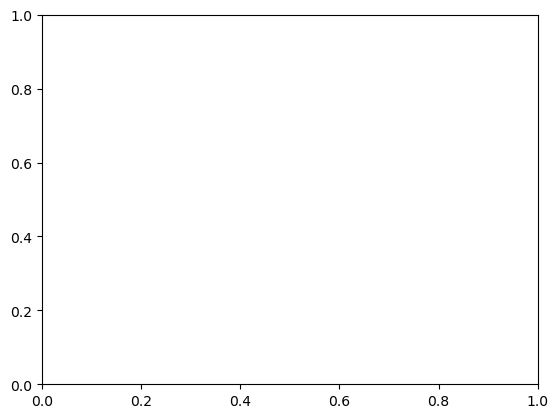

In [30]:
fig, ax = plt.subplots()
CS = ax.contourf(results.index,results.columns,results.values,levels=50)
ax.set_ylabel('taux départ du Québec RNP')
ax.set_xlabel('taux réduction entrée RNP')
fig.colorbar(CS)




In [11]:
scn = immsim()
scn.set_npr_policy(entry_cap = 252e3*(1-0.2), renewal_rate = 0.6)
scn.set_imm_policy(entry_cap = 40e3, accept_rate = 0.08)
scn.proj(2025)

In [12]:
years = np.arange(2024,2031)
scenarios = ['référence','alternatif']  
stats = ['population','solde des RNP','taux d\'activité']
results = pd.DataFrame(index=years,columns=pd.MultiIndex.from_product([scenarios,stats]),dtype='float64')

In [47]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024        NaN           NaN             NaN        NaN           NaN   
2025        NaN           NaN             NaN        NaN           NaN   
2026        NaN           NaN             NaN        NaN           NaN   
2027        NaN           NaN             NaN        NaN           NaN   
2028        NaN           NaN             NaN        NaN           NaN   
2029        NaN           NaN             NaN        NaN           NaN   
2030        NaN           NaN             NaN        NaN           NaN   

                      
     taux d'activité  
2024             NaN  
2025             NaN  
2026             NaN  
2027             NaN  
2028             NaN  
2029             NaN  
2030             NaN

In [13]:
results.loc[:,('référence','population')] = ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6
results.loc[:,('alternatif','population')] = scn.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6


/var/folders/nh/qjp9633j72b520_7wr4j95zc0000gp/T/ipykernel_38983/2949909731.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.051663 9.16333744580278 9.257965367597803 9.340624458383155
 9.412531494720687 9.47657553788686 9.534217835597909]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[:,('référence','population')] = ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6
/var/folders/nh/qjp9633j72b520_7wr4j95zc0000gp/T/ipykernel_38983/2949909731.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.051663 8.992936845802781 8.95947963958486 8.94719587449522
 8.947482952447283 8.954515843125538 8.96473536310872]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[:,('alternatif','population')] = scn.pop_sim.loc[2024:year_end,:].sum(axis=

In [49]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024   9.051663           NaN             NaN   9.051663           NaN   
2025   9.213337           NaN             NaN   9.032937           NaN   
2026   9.358705           NaN             NaN   9.040071           NaN   
2027   9.492846           NaN             NaN   9.067638           NaN   
2028   9.616949           NaN             NaN   9.105897           NaN   
2029   9.733922           NaN             NaN    9.15017           NaN   
2030   9.845224           NaN             NaN   9.197487           NaN   

                      
     taux d'activité  
2024             NaN  
2025             NaN  
2026             NaN  
2027             NaN  
2028             NaN  
2029             NaN  
2030             NaN

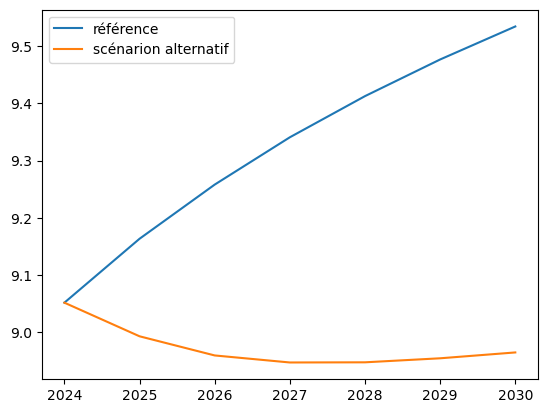

In [14]:
plt.figure()
plt.plot(ref.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='référence')
plt.plot(scn.pop_sim.loc[2024:year_end,:].sum(axis=1)*1e-6,label='scénarion alternatif')
plt.legend()
#plt.savefig('../Figures/scn_opt_pop.png',dpi=1200)
plt.show()

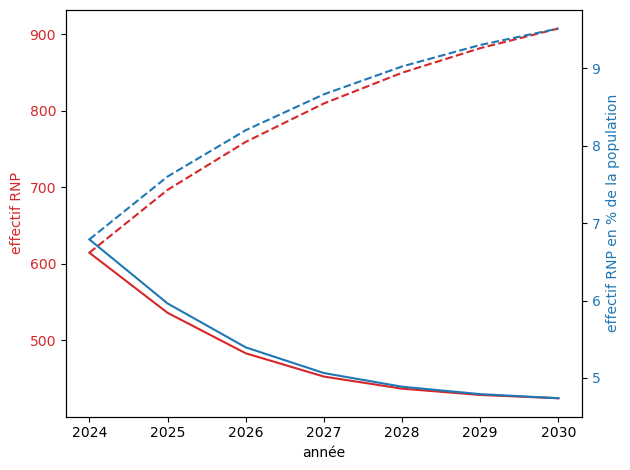

In [15]:
year_end = 2030
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('effectif RNP', color=color)
ax1.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, linestyle='--',label='référence')
ax1.plot(scn.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3, color=color, label='alternatif')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('effectif RNP en % de la population', color=color)  # we already handled the x-label with ax1
ax2.plot(ref.npr_sim.loc[2024:year_end,:].sum(axis=1)/ref.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,linestyle='--',label='référence')
ax2.plot(scn.npr_sim.loc[2024:year_end,:].sum(axis=1)/scn.pop_sim.loc[2024:,:].sum(axis=1)*100, 
         color=color,label='alternatif')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#fig.savefig('../Figures/scn_opt_solde.png',dpi=1200)
plt.show()

In [16]:
results.loc[:,('référence','effectif des RNP')] = ref.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3
results.loc[:,('alternatif','effectif des RNP')] = scn.npr_sim.loc[2024:year_end,:].sum(axis=1)*1e-3

In [53]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024   9.051663           NaN             NaN   9.051663           NaN   
2025   9.213337           NaN             NaN   9.032937           NaN   
2026   9.358705           NaN             NaN   9.040071           NaN   
2027   9.492846           NaN             NaN   9.067638           NaN   
2028   9.616949           NaN             NaN   9.105897           NaN   
2029   9.733922           NaN             NaN    9.15017           NaN   
2030   9.845224           NaN             NaN   9.197487           NaN   

                            référence       alternatif  
     taux d'activité effectif des RNP effectif des RNP  
2024             NaN          614.577          614.577  
2025             NaN         696.5764         536.1758  
2026             NaN        759.26112        483.30548  
2027             NaN       809.408896        452.91885  
2028             NaN       849.527117       437.117802  
2029             NaN       881.621693       428.901257  
2030             NaN       907.297355       424.628654

In [17]:
work_rates_sim_ref = []
work_rates_sim_scn = []
for tt in range(2024,2031):
    work = ref.pop_sim.loc[tt,15:65].sum() 
    work_rates_sim_ref.append(work/ref.pop.loc[tt,:].sum())
    work = scn.pop_sim.loc[tt,15:65].sum() 
    work_rates_sim_scn.append(work/scn.pop.loc[tt,:].sum())



In [18]:
results.loc[:,('référence','taux d\'activité')] = work_rates_sim_ref
results.loc[:,('alternatif','taux d\'activité')] = work_rates_sim_scn

In [56]:
results

référence                               alternatif                \
     population solde des RNP taux d'activité population solde des RNP   
2024   9.051663           NaN        0.649113   9.051663           NaN   
2025   9.213337           NaN        0.661685   9.032937           NaN   
2026   9.358705           NaN        0.672210   9.040071           NaN   
2027   9.492846           NaN        0.681673   9.067638           NaN   
2028   9.616949           NaN        0.686978   9.105897           NaN   
2029   9.733922           NaN        0.691313    9.15017           NaN   
2030   9.845224           NaN        0.695342   9.197487           NaN   

                            référence       alternatif  
     taux d'activité effectif des RNP effectif des RNP  
2024        0.649113          614.577          614.577  
2025        0.643893         696.5764         536.1758  
2026        0.640965        759.26112        483.30548  
2027        0.640235       809.408896        452.91885  
2028        0.637744       849.527117       437.117802  
2029        0.635740       881.621693       428.901257  
2030        0.634420       907.297355       424.628654

In [ ]:
#results.round(2).to_excel('../Figures/scn_opt.xlsx')

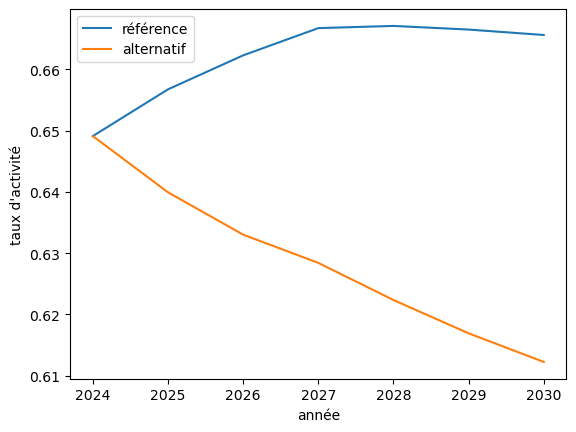

In [19]:
years = np.arange(2024,2031)
plt.figure()
plt.plot(years,work_rates_sim_ref,label='référence')
plt.plot(years,work_rates_sim_scn,label='alternatif')
plt.legend()
plt.xlabel('année')
plt.ylabel('taux d\'activité')
plt.show()